In [28]:
import json
from StringIO import StringIO
import chess

In [2]:
filename = '/Users/rvansoelen/Google Drive/Machine Learning/isc_games/games1.json'
#with open(filename, 'r') as f:
    #datastore = json.load(f.read())

In [ ]:
datastore

In [3]:
f = open(filename, 'r')

In [4]:
f

<open file '/Users/rvansoelen/Google Drive/Machine Learning/isc_games/games1.json', mode 'r' at 0x109df68a0>

In [5]:
string = f.readline()

In [61]:
dataset = json.loads(string)

In [78]:
dataset['gameHistory'][3]['truth']

10

In [77]:
test = dataset['gameHistory'][20]['truth']['fen']
test

u'rnbqk2r/pppp1ppp/3N1n2/4p3/1b6/8/PPPPPPPP/R1BQKBNR  w  - -  3'

In [26]:
f.close()

In [88]:
test = 'rnbqk2r/pppp1ppp/3N1n2/4p3/1b6/8/PPPPPPPP/R1BQKBNR  w  Kkq -  3'
print test
board = chess.Board(test+' 1') #Must append move counter. Assume it's the first move
print board

rnbqk2r/pppp1ppp/3N1n2/4p3/1b6/8/PPPPPPPP/R1BQKBNR  w  Kkq -  3
r n b q k . . r
p p p p . p p p
. . . N . n . .
. . . . p . . .
. b . . . . . .
. . . . . . . .
P P P P P P P P
R . B Q K B N R


In [56]:
dir(board)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algebraic',
 '_attacked_for_king',
 '_attackers_mask',
 '_castling_uncovers_rank_attack',
 '_clear_board',
 '_ep_skewered',
 '_epd_operations',
 '_from_chess960',
 '_generate_evasions',
 '_is_safe',
 '_parse_epd_ops',
 '_push_capture',
 '_remove_piece_at',
 '_repr_svg_',
 '_reset_board',
 '_set_board_fen',
 '_set_castling_fen',
 '_set_chess960_pos',
 '_set_piece_at',
 '_set_piece_map',
 '_slider_blockers',
 '_to_chess960',
 '_transposition_key',
 '_valid_ep_square',
 'aliases',
 'attackers',
 'attackers_mask',
 'attacks',
 'attacks_mask',
 'bishops',
 'board_fen',
 'can_claim_draw',
 'can_claim_fifty_moves',
 'can_claim_threefold_repetition',
 'captures_compulsory',


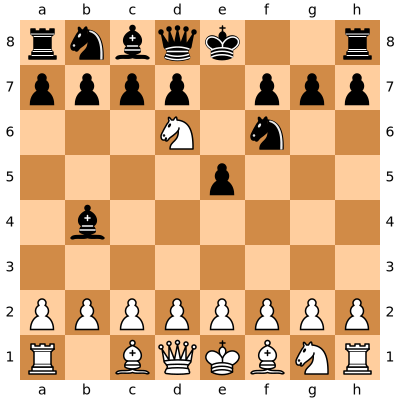

In [167]:
board

In [223]:
def getNormX(position):
    return (position%8.0)/7.0
def getNormY(position):
    return float(position/8)/7.0


In [65]:
#side2Move
#THIS IS PASSED DIRECTLY TO SECOND LAYER
side2Move = float(board.turn)

In [213]:
#king positions (this is covered elsewhere, but in a different group)
#THIS IS PASSED DIRECTLY TO SECOND LAYER
kingPosition = [getNormX(board.king(chess.WHITE)), 
                getNormY(board.king(chess.WHITE)), 
                getNormX(board.king(chess.BLACK)),
                getNormY(board.king(chess.BLACK))]
kingPosition

[0.5, 0.0, 0.5, 0.875]

In [225]:
#castlingRights
#THIS IS PASSED DIRECTLY TO SECOND LAYER (I think)
castlingRights = [float(board.has_kingside_castling_rights(chess.WHITE)), 
 float(board.has_queenside_castling_rights(chess.WHITE)), 
 float(board.has_kingside_castling_rights(chess.BLACK)), 
 float(board.has_queenside_castling_rights(chess.BLACK))]
castlingRights

[1.0, 0.0, 1.0, 1.0]

In [106]:
#numOfEachPieceType 
#THIS IS PASSED DIRECTLY TO SECOND LAYER
numOfEachPieceType = [len(board.pieces(chess.PAWN, chess.WHITE))/8.0, 
                      len(board.pieces(chess.KNIGHT, chess.WHITE))/2.0,
                      len(board.pieces(chess.BISHOP, chess.WHITE))/2.0,
                      len(board.pieces(chess.ROOK, chess.WHITE))/2.0,
                      len(board.pieces(chess.QUEEN, chess.WHITE))/1.0,
                      len(board.pieces(chess.PAWN, chess.BLACK))/8.0, 
                      len(board.pieces(chess.KNIGHT, chess.BLACK))/2.0,
                      len(board.pieces(chess.BISHOP, chess.BLACK))/2.0,
                      len(board.pieces(chess.ROOK, chess.BLACK))/2.0,
                      len(board.pieces(chess.QUEEN, chess.BLACK))/1.0]

In [ ]:
#pieceIsPresent, XYPosition, and attackers and defenders
def getPawnFeatures(color, board):
    #Assign each pawn to a slot based on X position
    
    #Remove pawns from board as they are assigned
    
    #Assign unassigned pawns to closest empty slot
    
    #For each slot:
        #If pawn exists
            #append piece exists
            #append coords
            #append lowest valued attackers and defenders (white and black attackers)
                #attack info is a normalize float value of least valueable attacker and defender
                #see variable SEE::SEE_MAT for values (WK is white king i think)
                #NormalizeCount(SEE::SEE_MAT[WK] + SEE::SEE_MAT[WK] / 2 - SEE::SEE_MAT[whitePt], SEE::SEE_MAT[WK] * 2)
                '''
                static const Score SEE_MAT[14] = {
                    1500, // WK
                    975, // WQ
                    500, // WR
                    325, // WN
                    325, // WB
                    100, // WP
                }
                '''
                
            
            
        #else push 0.0 for all

In [208]:
#pieceIsPresent, XYPosition, and attackers and defenders (not lowest value)
list(board.pieces(chess.KNIGHT, chess.WHITE))
#pawns
whitePawns = board.pieces(chess.PAWN, chess.WHITE)
whitePawnsList = list(whitePawns)
blackPawns = board.pieces(chess.PAWN, chess.BLACK)
blackPawnsList = list(blackPawns)
whitePawnIsPresent = []
whitePawnX = []
whitePawnY = []
whitePawnAttackers = []
whitePawnDefenders = []
blackPawnIsPresent = []
blackPawnX = []
blackPawnY = []
blackPawnAttackers = []
blackPawnDefenders = []
##############################
#THE X AND Y COORDS ARE NOT NORMALIZED
##############################
for i in range(8):
    if i < len(whitePawns):
        position = whitePawnsList[i]
        whitePawnIsPresent.append(1.0)
        whitePawnX.append(position%8.0)
        whitePawnY.append(float(position/8))
        whitePawnAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
        whitePawnDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
    else:
        whitePawnIsPresent.append(0.0)
        whitePawnX.append(-1.0)
        whitePawnY.append(-1.0)
        whitePawnAttackers.append([0.0]*64)
        whitePawnDefenders.append([0.0]*64)
    if i < len(blackPawns):
        position = blackPawnsList[i]
        blackPawnIsPresent.append(1.0)
        blackPawnX.append(position%8.0)
        blackPawnY.append(float(position/8))
        blackPawnAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
        blackPawnDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
    else:
        blackPawnIsPresent.append(0.0)
        blackPawnX.append(-1.0)
        blackPawnY.append(-1.0)
        blackPawnAttackers.append([0.0]*64)
        blackPawnDefenders.append([0.0]*64)

#knights
whiteKnights = board.pieces(chess.KNIGHT, chess.WHITE)
whiteKnightsList = list(whiteKnights)
blackKnights = board.pieces(chess.KNIGHT, chess.BLACK)
blackKnightsList = list(blackKnights)
whiteKnightIsPresent = []
whiteKnightX = []
whiteKnightY = []
whiteKnightAttackers = []
whiteKnightDefenders = []
blackKnightIsPresent = []
blackKnightX = []
blackKnightY = []
blackKnightAttackers = []
blackKnightDefenders = []
for i in range(2):
    if i < len(whiteKnights):
        position = whiteKnightsList[i]
        whiteKnightIsPresent.append(1.0)
        whiteKnightX.append(position%8.0)
        whiteKnightY.append(float(position/8))
        whiteKnightAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
        whiteKnightDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
    else:
        whiteKnightIsPresent.append(0.0)
        whiteKnightX.append(-1.0)
        whiteKnightY.append(-1.0)
        whiteKnightAttackers.extend([0.0]*64)
        whiteKnightDefenders.extend([0.0]*64)
    if i < len(blackKnights):
        position = blackKnightsList[i]
        blackKnightIsPresent.append(1.0)
        blackKnightX.append(position%8.0)
        blackKnightY.append(float(position/8))
        blackKnightAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
        blackKnightDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
    else:
        blackKnightIsPresent.append(0.0)
        blackKnightX.append(-1.0)
        blackKnightY.append(-1.0)
        blackKnightAttackers.extend([0.0]*64)
        blackKnightDefenders.extend([0.0]*64)

#bishops
whiteBishops = board.pieces(chess.BISHOP, chess.WHITE)
whiteBishopsList = list(whiteBishops)
blackBishops = board.pieces(chess.BISHOP, chess.BLACK)
blackBishopsList = list(blackBishops)
whiteBishopIsPresent = []
whiteBishopX = []
whiteBishopY = []
whiteBishopAttackers = []
whiteBishopDefenders = []
blackBishopIsPresent = []
blackBishopX = []
blackBishopY = []
blackBishopAttackers = []
blackBishopDefenders = []
for i in range(2):
    if i < len(whiteBishops):
        position = whiteBishopsList[i]
        whiteBishopIsPresent.append(1.0)
        whiteBishopX.append(position%8.0)
        whiteBishopY.append(float(position/8))
        whiteBishopAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
        whiteBishopDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
    else:
        whiteBishopIsPresent.append(0.0)
        whiteBishopX.append(-1.0)
        whiteBishopY.append(-1.0)
        whiteBishopAttackers.extend([0.0]*64)
        whiteBishopDefenders.extend([0.0]*64)
    if i < len(blackBishops):
        position = blackBishopsList[i]
        blackBishopIsPresent.append(1.0)
        blackBishopX.append(position%8.0)
        blackBishopY.append(float(position/8))
        blackBishopAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
        blackBishopDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
    else:
        blackBishopIsPresent.append(0.0)
        blackBishopX.append(-1.0)
        blackBishopY.append(-1.0)
        blackBishopAttackers.extend([0.0]*64)
        blackBishopDefenders.extend([0.0]*64)
        
#rooks
whiteRooks = board.pieces(chess.ROOK, chess.WHITE)
whiteRooksList = list(whiteRooks)
blackRooks = board.pieces(chess.ROOK, chess.BLACK)
blackRooksList = list(blackRooks)
whiteRookIsPresent = []
whiteRookX = []
whiteRookY = []
whiteRookAttackers = []
whiteRookDefenders = []
blackRookIsPresent = []
blackRookX = []
blackRookY = []
blackRookAttackers = []
blackRookDefenders = []
for i in range(2):
    if i < len(whiteRooks):
        position = whiteRooksList[i]
        whiteRookIsPresent.append(1.0)
        whiteRookX.append(position%8.0)
        whiteRookY.append(float(position/8))
        whiteRookAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
        whiteRookDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
    else:
        whiteRookIsPresent.append(0.0)
        whiteRookX.append(-1.0)
        whiteRookY.append(-1.0)
        whiteRookAttackers.extend([0.0]*64)
        whiteRookDefenders.extend([0.0]*64)
    if i < len(blackRooks):
        position = blackRooksList[i]
        blackRookIsPresent.append(1.0)
        blackRookX.append(position%8.0)
        blackRookY.append(float(position/8))
        blackRookAttackers.extend([float(x) for x in 
                              bin(board.attackers(chess.WHITE, position))[2:]])
        blackRookDefenders.extend([float(x) for x in 
                              bin(board.attackers(chess.BLACK, position))[2:]])
    else:
        blackRookIsPresent.append(0.0)
        blackRookX.append(-1.0)
        blackRookY.append(-1.0)
        blackRookAttackers.extend([0.0]*64)
        blackRookDefenders.extend([0.0]*64)

#queen
whiteQueen = board.pieces(chess.QUEEN, chess.WHITE)
blackQueen = board.pieces(chess.QUEEN, chess.BLACK)

if(len(whiteQueen)>0):
    position = list(whiteQueen)[0]
    whiteQueenIsPresent = [1.0]
    whiteQueenX = [position%8.0]
    whiteQueenY = [float(position/8)]
    whiteQueenAttackers = [float(x) for x in 
                          bin(board.attackers(chess.BLACK, position))[2:]]
    whiteQueenDefenders = [float(x) for x in 
                          bin(board.attackers(chess.WHITE, position))[2:]]
else:
    whiteQueenIsPresent = [0.0]
    whiteQueenX = [-1.0]
    whiteQueenY = [-1.0]
    whiteQueenAttackers = [0.0]*64
    whiteQueenDefenders = [0.0]*64
    
if(len(blackQueen)>0):
    position = list(blackQueen)[0]
    blackQueenIsPresent = [1.0]
    blackQueenX = [position%8.0]
    blackQueenY = [float(position/8)]
    blackQueenAttackers = [float(x) for x in 
                          bin(board.attackers(chess.WHITE, position))[2:]]
    blackQueenDefenders = [float(x) for x in 
                          bin(board.attackers(chess.BLACK, position))[2:]]
else:
    blackQueenIsPresent = [0.0]
    blackQueenX = [-1.0]
    blackQueenY = [-1.0]
    blackQueenAttackers = [0.0]*64
    blackQueenDefenders = [0.0]*64
    
#king
whiteKing = board.pieces(chess.KING, chess.WHITE)
blackKing = board.pieces(chess.KING, chess.BLACK)

if(len(whiteKing)>0):
    position = list(whiteKing)[0]
    whiteKingIsPresent = [1.0]
    whiteKingX = [position%8.0]
    whiteKingY = [float(position/8)]
    whiteKingAttackers = [float(x) for x in 
                          bin(board.attackers(chess.BLACK, position))[2:]]
    whiteKingDefenders = [float(x) for x in 
                          bin(board.attackers(chess.WHITE, position))[2:]]
else:
    whiteKingIsPresent = [0.0]
    whiteKingX = [-1.0]
    whiteKingY = [-1.0]
    whiteKingAttackers = [0.0]*64
    whiteKingDefenders = [0.0]*64
    
if(len(blackKing)>0):
    position = list(blackKing)[0]
    blackKingIsPresent = [1.0]
    blackKingX = [position%8.0]
    blackKingY = [float(position/8)]
    blackKingAttackers = [float(x) for x in 
                          bin(board.attackers(chess.WHITE, position))[2:]]
    blackKingDefenders = [float(x) for x in 
                          bin(board.attackers(chess.BLACK, position))[2:]]
else:
    blackKingIsPresent = [0.0]
    blackKingX = [-1.0]
    blackKingY = [-1.0]
    blackKingAttackers = [0.0]*64
    blackKingDefenders = [0.0]*64
    
pieceIsPresent = whitePawnIsPresent + blackPawnIsPresent \
               + whiteKnightIsPresent + blackKnightIsPresent \
               + whiteBishopIsPresent + blackBishopIsPresent \
               + whiteRookIsPresent + blackRookIsPresent \
               + whiteQueenIsPresent + blackQueenIsPresent \
               + whiteKingIsPresent + blackKingIsPresent 
            
pieceX = whitePawnX + blackPawnX \
               + whiteKnightX + blackKnightX \
               + whiteBishopX + blackBishopX \
               + whiteRookX + blackRookX \
               + whiteQueenX + blackQueenX \
               + whiteKingX + blackKingX
            
pieceY = whitePawnY + blackPawnY \
               + whiteKnightY + blackKnightY \
               + whiteBishopY + blackBishopY \
               + whiteRookY + blackRookY \
               + whiteQueenY + blackQueenY \
               + whiteKingY + blackKingY
            
pieceAttackers = whitePawnAttackers + blackPawnAttackers \
               + whiteKnightAttackers + blackKnightAttackers \
               + whiteBishopAttackers + blackBishopAttackers \
               + whiteRookAttackers + blackRookAttackers \
               + whiteQueenAttackers + blackQueenAttackers \
               + whiteKingAttackers + blackKingAttackers
            
pieceDefenders = whitePawnDefenders + blackPawnDefenders \
               + whiteKnightDefenders + blackKnightDefenders \
               + whiteBishopDefenders + blackBishopDefenders \
               + whiteRookDefenders + blackRookDefenders \
               + whiteQueenDefenders + blackQueenDefenders \
               + whiteKingDefenders + blackKingDefenders

In [179]:
[float(x) for x in bin(blackPawns)[2:]][:3]

[1.0, 1.0, 1.0]

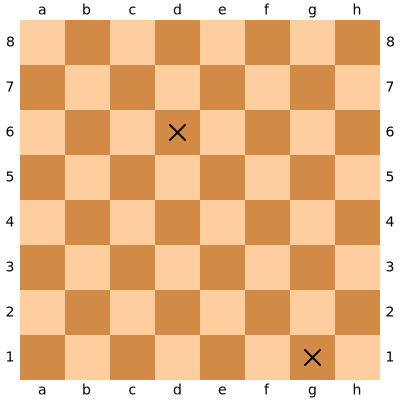

In [166]:
knights = board.pieces(chess.KNIGHT, chess.WHITE)
knights

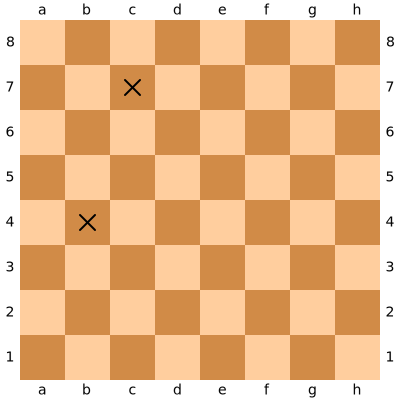

In [169]:
attackers = list(board.attackers(chess.BLACK, list(knights)[1]))
attackers.
#lowestValue = None
#for attacker in attackers:
#    if board.piece_type_at(attacker) == chess.PAWN

In [199]:
[float(x) for x in bin(8)[2:]]

[1.0, 0.0, 0.0, 0.0]

In [181]:
bin(board.castling_rights)

'0b1000000100000000000000000000000000000000000000000000000010000000'

In [187]:
x = [1]
x.extend([1, 2])

In [188]:
x

[1, 1, 2]